In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split

In [2]:
# Adjusting Visual Styles
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.3)

# Ensure visualizations are displayed inline
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [5]:
df = df.drop('Unnamed: 32', axis=1)

In [6]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [7]:
#Visualizing class distribution
class_counts = df['diagnosis'].value_counts()


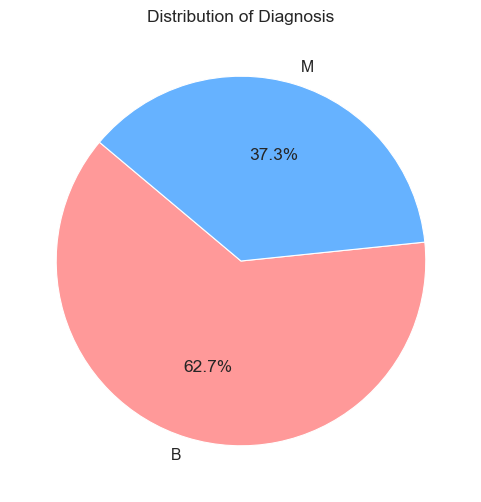

Count of cells labeled as Benign:  357
Count of cells labeled as Malignant:  212

Percentage of cells labeled Benign:  62.74 %
Percentage of cells labeled Malignant:  37.26 %


In [8]:
# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B2FF'])
plt.title('Distribution of Diagnosis')
plt.show()
# Counting observations in each class
benign_count, malignant_count = df['diagnosis'].value_counts()
print('Count of cells labeled as Benign: ', benign_count)
print('Count of cells labeled as Malignant: ', malignant_count)
print('')
print('Percentage of cells labeled Benign: ', round(benign_count / len(df) * 100, 2), '%')
print('Percentage of cells labeled Malignant: ', round(malignant_count / len(df) * 100, 2), '%')

In [9]:
# Drop columns associated with "worst" attributes
worst_cols = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
              'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
              'fractal_dimension_worst']
df = df.drop(worst_cols, axis=1)

# Remove columns linked to "perimeter" and "area" attributes
perimeter_area_cols = ['perimeter_mean', 'perimeter_se', 'area_mean', 'area_se']
df = df.drop(perimeter_area_cols, axis=1)

# Eliminate columns related to "concavity" and "concave points" attributes
concavity_cols = ['concavity_mean', 'concavity_se', 'concave points_mean', 'concave points_se']
df = df.drop(concavity_cols, axis=1)

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

In [11]:
X = df
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [12]:
# Create a string for the formula
cols = df.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      385
Model Family:                              Binomial   Df Model:                           12
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -55.340
Date:                              Fri, 30 May 2025   Deviance:                       110.68
Time:                                      23:09:21   Pearson chi2:                     125.
No. Iterations:                                   9   Pseudo R-squ. (CS):             0.6539
Covariance Type:                          nonrobust                                         
                             coef    std err          z      P>|z|    

In [19]:
X_test

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,
891923,B,13.770,13.27,0.09198,0.06221,0.1592,0.05912,0.2191,0.6946,0.004348,0.008153,0.02154,0.001802
848406,M,14.680,20.13,0.09867,0.07200,0.1586,0.05922,0.4727,1.2400,0.005718,0.011620,0.01410,0.002085
907915,B,12.400,17.68,0.10540,0.13160,0.1811,0.07102,0.1767,1.4600,0.010000,0.032950,0.02187,0.006005
911201,B,14.530,13.98,0.10990,0.09242,0.1650,0.06121,0.3060,0.7213,0.006133,0.012510,0.02207,0.003563
84799002,M,14.540,27.54,0.11390,0.15950,0.2303,0.07077,0.3700,1.0330,0.005607,0.042400,0.01857,0.005466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897137,B,11.250,14.78,0.08306,0.04458,0.1773,0.06081,0.2144,0.9961,0.005617,0.007124,0.01700,0.002030
9113514,B,9.668,18.10,0.08311,0.05428,0.1680,0.06412,0.3416,1.3120,0.010980,0.012570,0.02693,0.002979
9110127,M,18.030,16.85,0.08947,0.12320,0.1720,0.05780,0.2986,0.5906,0.004117,0.015600,0.01295,0.002436


In [20]:
# predict the test data and show the first 10 predictions
predictions = logistic_fit.predict(X_test)
predictions[:10]
id

<function id(obj, /)>

In [21]:
print(predictions[:10])

id
891923      0.997187
848406      0.324251
907915      0.996906
911201      0.964710
84799002    0.000544
8911164     0.838719
9113156     0.609435
863031      0.967341
8711216     0.053005
865137      0.999907
dtype: float64


In [22]:
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[:10]

['B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B']

In [23]:
# Display classification report
print(classification_report(y_test, predictions_nominal, digits=3))

# Calculate and display the confusion matrix
cfm = confusion_matrix(y_test, predictions_nominal)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

# Display the count of true negatives, false positives, false negatives, and true positives
print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)

              precision    recall  f1-score   support

           B      0.982     0.965     0.974       115
           M      0.931     0.964     0.947        56

    accuracy                          0.965       171
   macro avg      0.957     0.965     0.961       171
weighted avg      0.966     0.965     0.965       171

Confusion Matrix: 
 [[111   4]
 [  2  54]] 

True Negative: 111
False Positive: 4
False Negative: 2
True Positive: 54


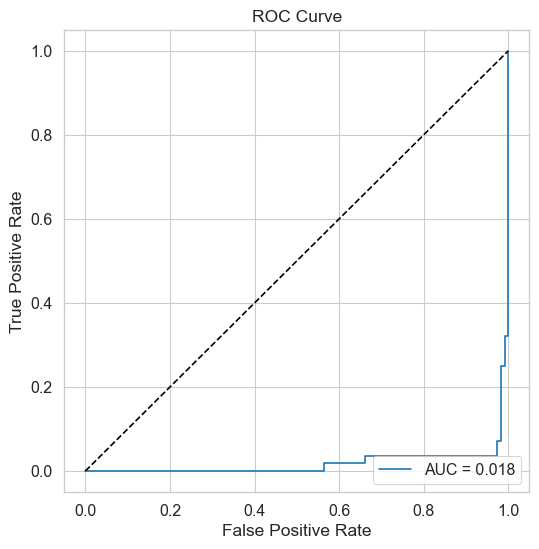

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

# Convert y_test to binary: M=1, B=0
y_test_binary = y_test.map({'M': 1, 'B': 0})

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions)
auc_score = roc_auc_score(y_test_binary, predictions)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

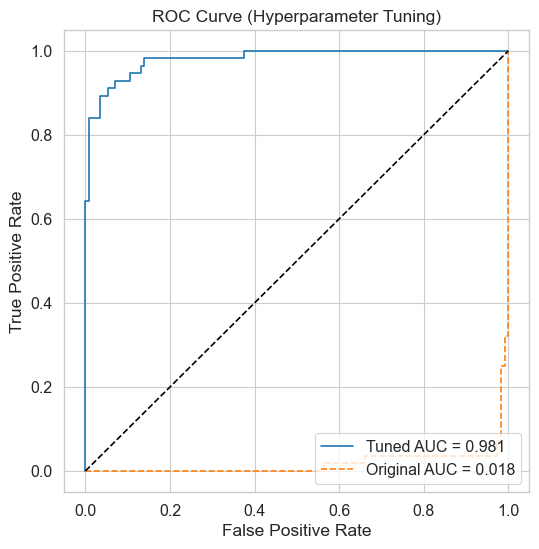

Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Prepare features and target (excluding 'diagnosis' from X)
X_train_features = X_train.drop('diagnosis', axis=1)
X_test_features = X_test.drop('diagnosis', axis=1)

# Encode target variable
y_train_binary = y_train.map({'M': 1, 'B': 0})
y_test_binary = y_test.map({'M': 1, 'B': 0})

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Set up GridSearchCV
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_features, y_train_binary)

# Best estimator
best_lr = grid.best_estimator_

# Predict probabilities
probs = best_lr.predict_proba(X_test_features)[:, 1]

# Compute ROC curve and AUC
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test_binary, probs)
auc_score_tuned = roc_auc_score(y_test_binary, probs)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned AUC = {auc_score_tuned:.3f}')
plt.plot(fpr, tpr, label=f'Original AUC = {auc_score:.3f}', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Hyperparameter Tuning)')
plt.legend(loc='lower right')
plt.show()

print("Best hyperparameters:", grid.best_params_)